In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from utils.plot import *
from utils.data_manipulation import *
from utils.equations import *


In [14]:
# Load IMU data from file
data_KVH   = loadmat('/Users/moezrashed/Documents/Programming/Python/Project1/NovAtel/1.RAWIMU.mat'                          , simplify_cells=True) #High-end unit
data_TPI   = loadmat('/Users/moezrashed/Documents/Programming/Python/Project1/TPI/1.TPI_data_denoised_LOD6_interpolated2.mat', simplify_cells=True) #Low-end unit

# Load the ground truth from file
data_GT    = loadmat('/Users/moezrashed/Documents/Programming/Python/Project1/NovAtel/3.INSPVA_Reference.mat'                , simplify_cells=True)

# Load the Odometer data from file
data_OD    = loadmat('/Users/moezrashed/Documents/Programming/Python/Project1/OBDII_data/CarChip_Speed.mat'                  , simplify_cells=True)
time_OD    = loadmat('/Users/moezrashed/Documents/Programming/Python/Project1/OBDII_data/odo_second.mat'                     , simplify_cells=True)

# Load the ground truth data
gt         = load_gt(data_GT)

# Load the sensor data from the IMU units
TPI        = load_imu(data_TPI)
KVH        = load_imu(data_KVH)

# Load the Odometer data
odo        = load_odometer(data_OD, time_OD)

# Calculating start time and end time
start_time = max(TPI[6][0], KVH[6][0], gt[9][0], odo[1][0])
end_time   = min(TPI[6][-1], KVH[6][-1], gt[9][-1], odo[1][-1])

# Trimming data
TPI        = trim_data(TPI, start_time, end_time, 6)
KVH        = trim_data(KVH, start_time, end_time, 6)
odo        = trim_data(odo, start_time, end_time, 1)
gt         = trim_data(gt , start_time, end_time, 9)

# Down sample data to 1 Hz [to match odo]
gt         = downsample_by_mean(gt , 5)
TPI        = downsample_by_mean(TPI, 20)
KVH        = downsample_by_mean(KVH, 200)

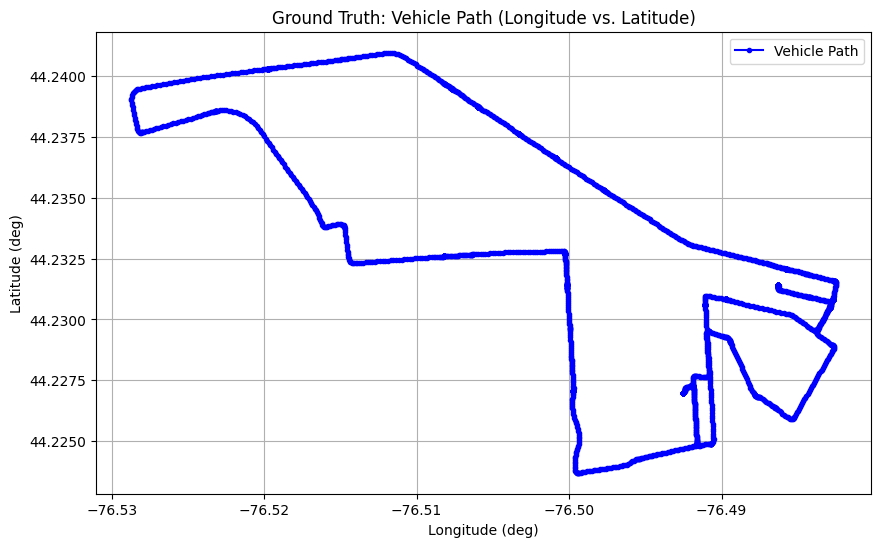

In [15]:
# Extract ground truth data
lat_gt = gt[1]   # Latitude (radians)
long_gt = gt[2]  # Longitude (radians)

# Convert latitude and longitude from radians to degrees for plotting
lat_gt_deg = np.degrees(lat_gt)
long_gt_deg = np.degrees(long_gt)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot longitude vs. latitude
plt.plot(long_gt_deg, lat_gt_deg, label='Vehicle Path', color='blue', marker='o', markersize=3, linestyle='-')

# Add labels and title
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Ground Truth: Vehicle Path (Longitude vs. Latitude)')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [17]:
# Plot the sensor data of the TPI IMU unit
plot_imu_data(TPI[0], TPI[1], TPI[2], TPI[-1])


NameError: name 'plot_imu_data' is not defined

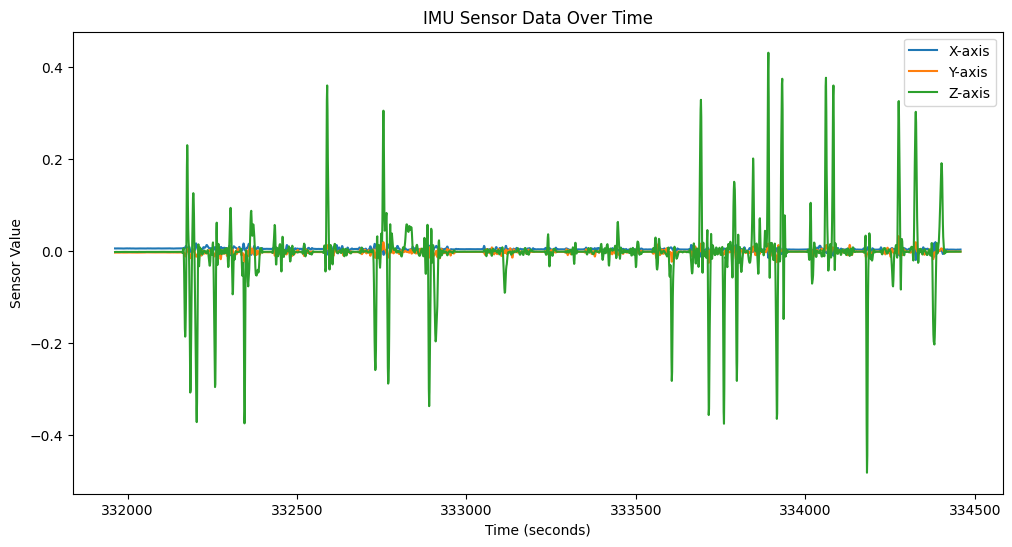

In [ ]:
plot_gyro_data(TPI[3], TPI[4], TPI[5], TPI[-1])

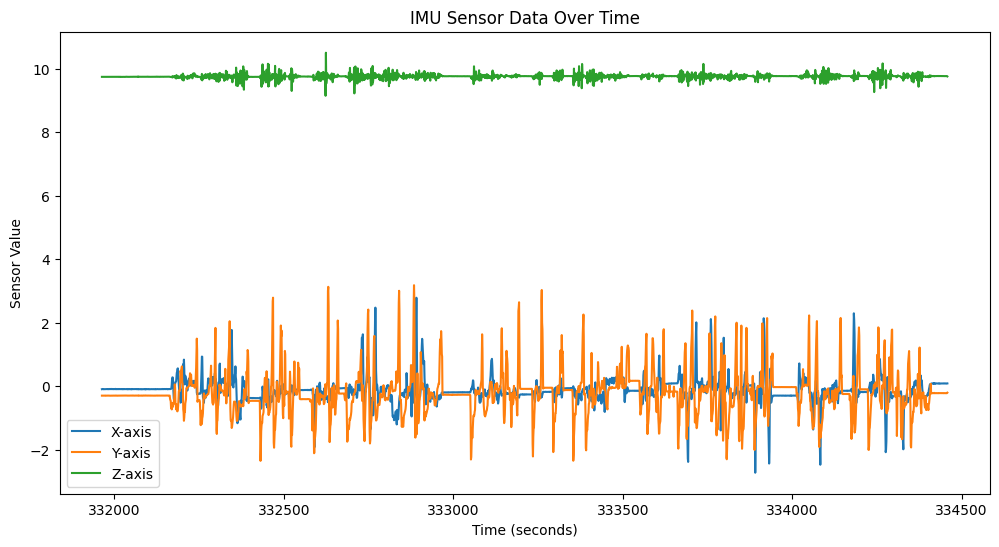

In [ ]:
plot_imu_data(KVH[0], KVH[1], KVH[2], KVH[-1])

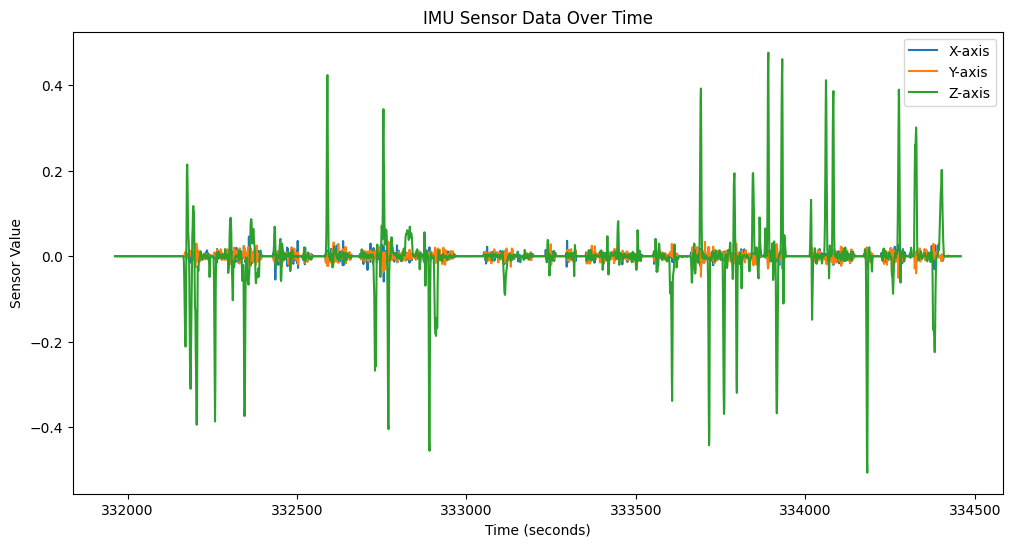

In [8]:
plot_gyro_data(KVH[3], KVH[4], KVH[5], KVH[-1])